# Libraries 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Import Train/Test Set

In [ ]:
# Import train/test data and make arrays

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [5]:
features_list = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q']
target_list = ['stator_yoke']

In [6]:
X_train = df_train[features_list].to_numpy()
y_train = df_train[target_list].to_numpy()

In [7]:
X_train.shape, y_train.shape

((942653, 7), (942653, 1))

In [8]:
X_test = df_test[features_list].to_numpy()
y_test = df_test[target_list].to_numpy()

In [9]:
X_test.shape, y_test.shape

((55393, 7), (55393, 1))

# Data Preprocessing

In [ ]:
# Some of the models we'll be using will be sensitive to feature scaling. Let's do some scaling first.

In [11]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [12]:
X_train_scaled = scaler.fit_transform(X_train)

In [15]:
X_test_scaled = scaler.transform(X_test)

# Predictive Models

## Linear Regression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
lr.score(X_test, y_test)

0.8262629515726763

In [20]:
y_pred_lr = lr.predict(X_test)

RMSE: 0.39355464708244764


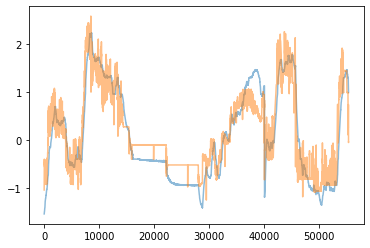

In [22]:
plt.plot(y_test, alpha=0.5)
plt.plot(y_pred_lr, alpha=0.5)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
print(f'RMSE: {rmse_lr}')

## Ridge

In [34]:
ridge = Ridge(alpha=0.01)

In [35]:
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.01)

In [36]:
ridge.score(X_test_scaled, y_test)

0.8262628961720583

In [37]:
y_pred_ridge = ridge.predict(X_test_scaled)

RMSE: 0.3935547098300571


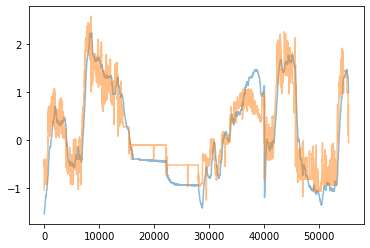

In [38]:
plt.plot(y_test, alpha=0.5)
plt.plot(y_pred_ridge, alpha=0.5)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print(f'RMSE: {rmse_ridge}')

## Decision Tree Regressor

## Random Forest Regressor 